# Thermal Sunyaev Zeldovich Power Spectrum Calculation<a id = 'cl_sz'></a>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})
import numpy as np
import os
from classy_sz import Class as Class_sz

PATH_TO_CLASS_SZ_DATA not set.
Defaulting to: /Users/boris/class_sz_data_directory
Found class_sz_data_directory directory with all repositories at: /Users/boris/class_sz_data_directory
PATH_TO_CLASS_SZ_DATA is not correctly set. Setting it now...
PATH_TO_CLASS_SZ_DATA is set to /Users/boris/class_sz_data_directory
Required directories already exist. Skipping download.


**Cosmological parameters**

In [2]:
cosmo_params= {
'omega_b': 0.02242,
'omega_cdm':  0.11933,
'H0': 67.66, 
'tau_reio': 0.0561,
'ln10^{10}A_s': 3.047,
'n_s': 0.9665, 
"cosmo_model": 1, # use lcdm emulators
}

**Precision parameters**

In [3]:
precision_params = {
'x_outSZ': 4., # truncate profile beyond x_outSZ*r_s

'n_m_pressure_profile' :50, # default: 100, decrease for faster
'n_z_pressure_profile' :50, # default: 100, decrease for faster
    

'use_fft_for_profiles_transform' : 1, # use fft's or not. 
# only used if use_fft_for_profiles_transform set to 1
'N_samp_fftw' : 512,
'x_min_gas_pressure_fftw' : 1e-4,
'x_max_gas_pressure_fftw' : 1e4,
    
    
'ndim_redshifts' :30,

    
'redshift_epsabs': 1.0e-40,
'redshift_epsrel': 0.0001,    

    
'mass_epsabs': 1.0e-40,
'mass_epsrel': 0.0001
}

**Explicit calculations with FFTs**

In [4]:
%%time

classy_sz = Class_sz()
classy_sz.set(cosmo_params)
classy_sz.set(precision_params)
classy_sz.set({

'output': 'tSZ_tSZ_1h,tSZ_tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass_function' : 'T08M500c',



'pressure profile':'custom_gnfw', # can be Battaglia, Arnaud, etc
    
"P0GNFW": 8.130,
"c500": 1.156,
"gammaGNFW": 0.3292,
"alphaGNFW": 1.0620,
"betaGNFW":5.4807,
    



})
classy_sz.compute_class_szfast()

CPU times: user 3.81 s, sys: 832 ms, total: 4.65 s
Wall time: 627 ms


In [5]:
l = np.asarray(classy_sz.cl_sz()['ell'])
cl_yy_1h = np.asarray(classy_sz.cl_sz()['1h'])
cl_yy_2h = np.asarray(classy_sz.cl_sz()['2h'])

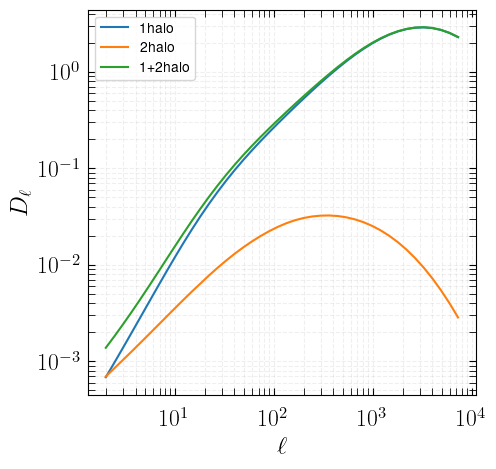

In [6]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')
ax.legend()

**calculation with Arnaud et 2010 tabulated profile**

In [7]:
%%time
classy_sz_A10 = Class_sz()
classy_sz_A10.set(cosmo_params)
classy_sz_A10.set(precision_params)
classy_sz_A10.set({

'output': 'tSZ_1h,tSZ_2h',
    
"ell_min" : 2,
"ell_max" : 8000,
'dell': 0,
'dlogell': 0.2,
    
'z_min' : 0.005,
'z_max' : 3.0,
'M_min' : 1.0e10, 
'M_max' : 3.5e15,
 

'mass function' : 'T08M500c',

'pressure profile':'A10', # can be Battaglia, Arnaud, etc

})
classy_sz_A10.compute_class_szfast()

CPU times: user 2.13 s, sys: 775 ms, total: 2.91 s
Wall time: 416 ms


In [8]:
l_A10 = np.asarray(classy_sz_A10.cl_sz()['ell'])
cl_yy_1h_A10 = np.asarray(classy_sz_A10.cl_sz()['1h'])
cl_yy_2h_A10 = np.asarray(classy_sz_A10.cl_sz()['2h'])

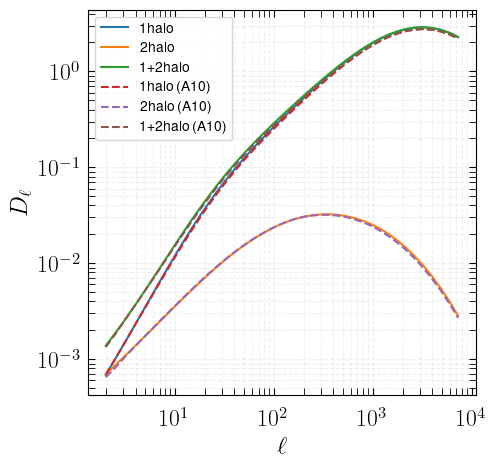

In [9]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(5,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')
ax.set_yscale('log')

ax.plot(l,cl_yy_1h,label='1halo')
ax.plot(l,cl_yy_2h,label='2halo')
ax.plot(l,cl_yy_2h+cl_yy_1h,label='1+2halo')

ax.plot(l_A10,cl_yy_1h_A10,label='1halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10,label='2halo (A10)',ls='--')
ax.plot(l_A10,cl_yy_2h_A10+cl_yy_1h_A10,label='1+2halo (A10)',ls='--')
ax.legend()

In [9]:
10*h

6.74

In [16]:
%%time
h = 0.674
omega_b = 0.0224
Omega_m=0.315
sigma8=0.811
N_ur = 3.046
n_s = 0.965
tau_reio=0.054
N_ncdm=0
m_ncdm=0

Mclass_sz = Class_sz(default=False)

Mclass_sz.set({

'h': h,
'sigma8': sigma8,
'n_s': n_s,
'tau_reio': tau_reio,
'omega_b': omega_b,
'omega_cdm':  0.1207,#Omega_m*h**2-omega_b,  
'N_ur': 3.046,


'output': 'tSZ_1h',

'pressure profile':'B12',
'delta for electron pressure':'200c',
"concentration parameter":"D08",
"ell_min" : 125,
"ell_max" : 9725,
'dell': 200,
'dlogell': 0.,
    
'M_min' : 1e11*h, 
'M_max' : 1e16*h,

'z_min': 0.005,
'z_max': 6.,
    
    
'n_z_pressure_profile': 500,
'n_m_pressure_profile' : 500,
'n_l_pressure_profile' : 500,
    
'l_min_gas_pressure_profile' :  1.e-2,
'l_max_gas_pressure_profile' :  5.e4,    

'pressure_profile_epsrel':1e-4,
'pressure_profile_epsabs':1e-100,
    

    
    
'hm_consistency' : 0,
    

'use_fft_for_profiles_transform' : 1,
'x_min_gas_pressure_fftw' : 1e-5,
'x_max_gas_pressure_fftw' : 1e5,
'N_samp_fftw' : 8192,
    
    
# 'ndim_masses' : 500,
# 'ndim_redshifts' :100,
'redshift_epsrel': 1e-6,
'redshift_epsabs': 1e-100,
'mass_epsrel':1e-6,
'mass_epsabs':1e-100,    
    

'truncate_gas_pressure_wrt_rvir' : 1,
'x_outSZ': 2.,
'mass function' : 'T10',
'T10_alpha_fixed' : 1,
    
    
'P_k_max_h/Mpc': 10.,
'k_per_decade_class_sz':80.,
'k_min_for_pk_class_sz':1e-4,
'k_max_for_pk_class_sz': 10*h, 
    
'classy_sz_verbose': 'none'

})
Mclass_sz.compute()

CPU times: user 9min 7s, sys: 1.39 s, total: 9min 8s
Wall time: 1min


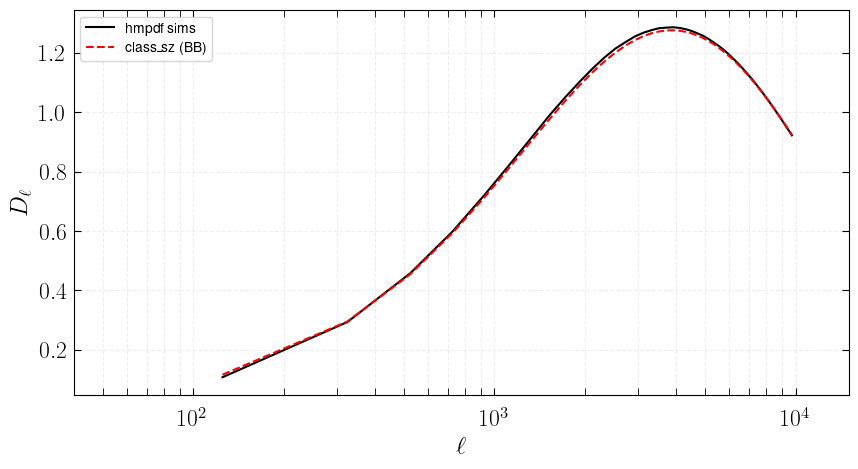

In [18]:
label_size = 17
title_size = 18
legend_size = 13
handle_length = 1.5
fig, (ax1) = plt.subplots(1,1,figsize=(10,5))
ax = ax1
ax.tick_params(axis = 'x',which='both',length=5,direction='in', pad=10)
ax.tick_params(axis = 'y',which='both',length=5,direction='in', pad=5)
ax.xaxis.set_ticks_position('both')
ax.yaxis.set_ticks_position('both')
plt.setp(ax.get_yticklabels(), rotation='horizontal', fontsize=label_size)
plt.setp(ax.get_xticklabels(), fontsize=label_size)
ax.grid( visible=True, which="both", alpha=0.2, linestyle='--')
ax.set_xlabel(r"$\ell$ ",size=title_size)
ax.set_ylabel(r"$D_\ell$",size=title_size)
ax.set_xscale('log')

df_hs_ls = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_NG_cov_ells_coarse_08Mar24.txt")
df_hs = np.loadtxt("/Users/boris/halosky_sims_tllp/hmpdf_sim_yy_PS_coarse_08Mar24.txt")
ax.plot(df_hs_ls,df_hs,label='hmpdf sims',c='k')

l = np.asarray(Mclass_sz.cl_sz()['ell'])
dl_yy_1h = np.asarray(Mclass_sz.cl_sz()['1h'])
ax.plot(l,dl_yy_1h,label='class_sz (BB)',c='r',ls='--')

# alina = np.load("/Users/boris/halosky_sims_tllp/cl_class_sz.npy", allow_pickle=True).flatten()[0]
# ax.plot(alina['ell'],alina['1h'],label='class_sz (AS)',c='g',ls='-.')

plt.xlim(40,1.5e4)
ax.legend()

In [15]:
Mclass_sz.cl_sz()['1h']

[0.1315401726233188,
 0.3302523634591425,
 0.5031815171966333,
 0.6514943316352351,
 0.7775063666939516,
 0.8838813360478102,
 0.9731629741423331,
 1.047630701740297,
 1.1093405096202706,
 1.160064313250449,
 1.2012417768760695,
 1.234249526615535,
 1.2601789041274072,
 1.2799295826832213,
 1.294447852824275,
 1.304415303242189,
 1.3104145704183137,
 1.3129425408204918,
 1.3124741334509256,
 1.3096708044559509,
 1.304537586982398,
 1.2974713976138221,
 1.288870170079351,
 1.2788535885249293,
 1.2674973026127614,
 1.2554382175614685,
 1.2424018633795377,
 1.228567285962646,
 1.214150643304165,
 1.1991843056629847,
 1.183998566928759,
 1.168472282863043,
 1.1526828454462157,
 1.1366980218134828,
 1.1205661589689544,
 1.1043989625087907,
 1.0882853591528217,
 1.0721811982162899,
 1.0560900723612552,
 1.0400190735122936,
 1.023966793586651,
 1.0079305082287566,
 0.9923788233576005,
 0.9768747371089649,
 0.9613934875735826,
 0.9459754562429181,
 0.931119468969944,
 0.9162626089747845,
 0.90

In [11]:
Mclass_sz.cl_sz()['ell']

[125.0,
 325.0,
 525.0,
 725.0,
 925.0,
 1125.0,
 1325.0,
 1525.0,
 1725.0,
 1925.0,
 2125.0,
 2325.0,
 2525.0,
 2725.0,
 2925.0,
 3125.0,
 3325.0,
 3525.0,
 3725.0,
 3925.0,
 4125.0,
 4325.0,
 4525.0,
 4725.0,
 4925.0,
 5125.0,
 5325.0,
 5525.0,
 5725.0,
 5925.0,
 6125.0,
 6325.0,
 6525.0,
 6725.0,
 6925.0,
 7125.0,
 7325.0,
 7525.0,
 7725.0,
 7925.0,
 8125.0,
 8325.0,
 8525.0,
 8725.0,
 8925.0,
 9125.0,
 9325.0,
 9525.0,
 9725.0]

In [ ]:
## see https://github.com/borisbolliet/class_sz/commit/e3182a7599cd95742d093c0e33eb6156ad97c052